### **Time Series using Tensorflow**

In [3]:
# DL needs
import tensorflow as tf
import keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

import sys
sys.path.append('/home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/')

import important_functionalities as impf
import time_series_functionalities as tsf

In [4]:
### RESULTS:
baseline_results = {'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

model_1_results = {'mae': 568.06366,
 'mse': 1159591.9,
 'rmse': 1076.8435,
 'mape': 2.5265791,
 'mase': 0.9979305}

model_2_results = {'mae': 597.3115,
 'mse': 1246714.0,
 'rmse': 1116.5635,
 'mape': 2.696134,
 'mase': 1.0441062}

model_3_results = {'mae': 1272.8289,
 'mse': 5554035.5,
 'rmse': 2356.7002,
 'mape': 5.8320484,
 'mase': 2.2649276}

model_4_results = {'mae': 566.3369,
 'mse': 1167021.1,
 'rmse': 1080.2875,
 'mape': 2.5285356,
 'mase': 0.99489707}

model_5_results = {'mae': 567.6664,
 'mse': 1167780.1,
 'rmse': 1080.6388,
 'mape': 2.5524669,
 'mase': 0.9972326}

model_6_results = {'mae': 564.60266,
 'mse': 1159175.1,
 'rmse': 1076.6499,
 'mape': 2.5315979,
 'mase': 0.9918505}

model_7_results = {'mae': 584.861,
 'mse': 1223363.5,
 'rmse': 1106.0576,
 'mape': 2.6246307,
 'mase': 1.0274389}

**26. Creating an ensemble (Model 8)**
* Stacking *different* models together.
* They use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituents learning algorithms alone.
* Tradeoff between performance and training and inference time.

In [5]:
data = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col=['Date'])
# parse the date column and tell pandas column 1 is date-time

In [6]:
# reduce the data to only have date and closing price of bit-coin
bitcoin_prices = pd.DataFrame(data["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [7]:
HORIZON = 1
WINDOW_SIZE = 7

bitcoin_prices_windowed = bitcoin_prices.copy()
for i in range(WINDOW_SIZE,0,-1):
    bitcoin_prices_windowed[f'Price+{WINDOW_SIZE-i+1}'] = bitcoin_prices['Price'].shift(periods=i)

bitcoin_prices_windowed

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,NaN,NaN,NaN,NaN,NaN,NaN,123.654990
2013-10-03,108.584830,NaN,NaN,NaN,NaN,NaN,123.654990,125.455000
2013-10-04,118.674660,NaN,NaN,NaN,NaN,123.654990,125.455000,108.584830
2013-10-05,121.338660,NaN,NaN,NaN,123.654990,125.455000,108.584830,118.674660
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,56583.849879,57107.120672,58788.209679,58102.191426,55715.546651,56573.555472,52147.821187
2021-05-15,50032.693137,57107.120672,58788.209679,58102.191426,55715.546651,56573.555472,52147.821187,49764.132082
2021-05-16,47885.625255,58788.209679,58102.191426,55715.546651,56573.555472,52147.821187,49764.132082,50032.693137


In [8]:
# make features and labels
X = bitcoin_prices_windowed.dropna().drop('Price',axis=1)
y = bitcoin_prices_windowed.dropna()['Price']

X

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2013-10-08,123.654990,125.455000,108.584830,118.674660,121.338660,120.655330,121.795000
2013-10-09,125.455000,108.584830,118.674660,121.338660,120.655330,121.795000,123.033000
2013-10-10,108.584830,118.674660,121.338660,120.655330,121.795000,123.033000,124.049000
2013-10-11,118.674660,121.338660,120.655330,121.795000,123.033000,124.049000,125.961160
2013-10-12,121.338660,120.655330,121.795000,123.033000,124.049000,125.961160,125.279660
...,...,...,...,...,...,...,...
2021-05-14,56583.849879,57107.120672,58788.209679,58102.191426,55715.546651,56573.555472,52147.821187
2021-05-15,57107.120672,58788.209679,58102.191426,55715.546651,56573.555472,52147.821187,49764.132082
2021-05-16,58788.209679,58102.191426,55715.546651,56573.555472,52147.821187,49764.132082,50032.693137


In [9]:
y

Date
2013-10-08      123.033000
2013-10-09      124.049000
2013-10-10      125.961160
2013-10-11      125.279660
2013-10-12      125.927500
                  ...     
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Price, Length: 2780, dtype: float64

In [10]:
# test train splits
test_size = 0.2
split_size = int(len(X)*(1-test_size))

X_train,y_train = X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

In [11]:
# making the dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train) 

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# combine labels and features by zipping them together -> (features,labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

# batch and prefetch
BATCH_SIZE = 1024 # N-BEATS paper uses a batch size of 1024
train_dataset = train_dataset.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [17]:
# constructing and fitting an ensemble of models (using different loss functions: MAE, MSE, MAPE)
def get_ensemble_models(horizon = HORIZON,
                       train_data = None,
                       test_data = None,
                       num_iter = None, # number of models we are going to train 
                       num_epochs = None,
                       loss_fns = ['mae','mse','mape']
                       ):
    '''
    Returns a list of num_iter models, each trained on MAE, MSE and MAPE loss.

    For example, if num_iter = 10, a list of 30 trained models will be returned:
    10*len(['mae','mse','mape'])
    '''
    
    # making empty list for trained ensemble models 
    ensemble_models = []

    # create num_iter number of models per loss function
    for i in range(num_iter):
        # Build and fit  a new model with a different loss function
        for loss_function in loss_fns:
            print(f'Optimizing model by reducing {loss_function} for {num_epochs} epochs, model number: {i+1}')

            # construct a model
            model= tf.keras.Sequential([
                # initialize dense layers with normal distribution for estimating prediction intervals later on. 
                tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
                tf.keras.layers.Dense(128,activation='relu'),
                tf.keras.layers.Dense(horizon,activation='linear',kernel_initializer='he_normal')
            ], name=f'model_{i+1}_{loss_function}')

            # compile the model with loss_function
            model.compile(loss=loss_function,optimizer = tf.keras.optimizers.Adam(), metrics = ['mae','mse'])

            # fit the model 
            model.fit(train_data,
                      epochs = num_epochs,
                      verbose = 0,
                      validation_data = test_data,
                      callbacks = [tf.keras.callbacks.EarlyStopping(
                        monitor = 'val_loss', patience = 200, restore_best_weights = True  
                      ),
                                   tf.keras.callbacks.ReduceLROnPlateau(
                        monitor = 'val_loss', patience = 100, verbose = 1                            
                      )    
                                   ]
                      )
             
             # appending fitted model to list of ensemble models
            ensemble_models.append(model)
    
    # returning the ensemble models
    return ensemble_models     
    

In [19]:
%%time 
# get list of ensemble models trained on our data
ensemble_models = get_ensemble_model(num_iter=5,
                                    num_epochs = 1000,
                                    train_data = train_dataset,
                                    test_data = test_dataset
                                    )


Optimizing model by reducing mae for 1000 epochs, model number: 1

Epoch 469: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 569: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing mse for 1000 epochs, model number: 1

Epoch 700: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 800: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing mape for 1000 epochs, model number: 1

Epoch 127: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 243: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 343: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing mae for 1000 epochs, model number: 2
Optimizing model by reducing mse for 1000 epochs, model number: 2

Epoch 480: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 580: ReduceLROnPlateau

In [20]:
len(ensemble_models)

15

In [21]:
ensemble_models

[<Sequential name=model_1_mae, built=True>,
 <Sequential name=model_1_mse, built=True>,
 <Sequential name=model_1_mape, built=True>,
 <Sequential name=model_2_mae, built=True>,
 <Sequential name=model_2_mse, built=True>,
 <Sequential name=model_2_mape, built=True>,
 <Sequential name=model_3_mae, built=True>,
 <Sequential name=model_3_mse, built=True>,
 <Sequential name=model_3_mape, built=True>,
 <Sequential name=model_4_mae, built=True>,
 <Sequential name=model_4_mse, built=True>,
 <Sequential name=model_4_mape, built=True>,
 <Sequential name=model_5_mae, built=True>,
 <Sequential name=model_5_mse, built=True>,
 <Sequential name=model_5_mape, built=True>]

In [ ]:
# making predictions with our ensemble model

def make_ensemble_preds(ensemble_models,input_data):
    '''
    Makes prediction using an ensemble of models
    '''
    ensemble_preds = []

    for model in ensemble_models:
        preds = model.predict(input_data)
        ensemble_preds.append(preds)
        
    return tf.constant(tf.squeeze(ensemble_preds))


In [27]:
%%time

# create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(
    ensemble_models = ensemble_models,
    input_data = test_dataset
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 158 ms, sys: 69.6 ms, total: 227 ms
Wall time: 139 ms


In [28]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8807.675,  8781.194,  9027.425, ..., 49834.266, 48685.207,
        45835.72 ],
       [ 8785.499,  8747.081,  8994.409, ..., 49298.52 , 48734.16 ,
        45842.457],
       [ 8748.134,  8800.704,  9087.047, ..., 49969.51 , 47279.086,
        45669.43 ],
       ...,
       [ 8804.58 ,  8809.196,  9060.86 , ..., 49950.164, 48421.94 ,
        46289.293],
       [ 8764.406,  8734.547,  9023.971, ..., 49868.035, 48468.8  ,
        46315.023],
       [ 8785.065,  8821.694,  9094.557, ..., 50211.86 , 47709.637,
        45818.703]], dtype=float32)>

In [30]:
ensemble_preds_mean = tf.reduce_mean(ensemble_preds,axis = 0)
ensemble_preds_median = np.median(ensemble_preds,axis = 0)

In [31]:
# evaluating results
model_8_mean_results = tsf.evaluate_time_series(y_test,ensemble_preds_mean)
model_8_median_results = tsf.evaluate_time_series(y_test,ensemble_preds_median)

In [32]:
model_8_mean_results

{'mae': 564.2059,
 'mse': 1138732.8,
 'rmse': 1067.1143,
 'mape': 2.5661576,
 'mase': 0.9911534}

In [33]:
model_8_median_results

{'mae': 565.84155,
 'mse': 1140681.2,
 'rmse': 1068.0269,
 'mape': 2.5704112,
 'mase': 0.9940269}

**27. Saving and loading trained ensemble model**

In [36]:
ens_save_path = 'ensemble_model'
for i,model in enumerate(ensemble_models):
    model.save(f'{ens_save_path}/model_{i+1}.keras')

In [38]:
loaded_ensemble_model = []
import os
for i,model in enumerate(os.listdir(ens_save_path)):
    loaded_ensemble_model.append(tf.keras.models.load_model(f"{ens_save_path}/{model}"))

In [39]:
make_ensemble_preds(loaded_ensemble_model,test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8807.675 ,  8781.194 ,  9027.425 , ..., 49834.266 , 48685.207 ,
        45835.72  ],
       [ 8805.519 ,  8796.769 ,  9112.108 , ..., 50050.234 , 48282.918 ,
        45983.4   ],
       [ 8805.6455,  8801.056 ,  9054.798 , ..., 49923.31  , 48133.582 ,
        45809.89  ],
       ...,
       [ 8834.996 ,  8797.724 ,  9041.571 , ..., 49900.434 , 47998.145 ,
        46030.348 ],
       [ 8785.499 ,  8747.081 ,  8994.409 , ..., 49298.52  , 48734.16  ,
        45842.457 ],
       [ 8748.134 ,  8800.704 ,  9087.047 , ..., 49969.51  , 47279.086 ,
        45669.43  ]], dtype=float32)>

**27. Importance of prediction intervals (uncertainity estimates) in forcasting**
* All our previous predictions are point predictions with our models, as our HORIZON = 1
* It is very helpful if we knew a range of where that prediction came from.
* The range/prediction interval need not be always accurate (as these too are estimates)
* One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method
  * Take the prediction from a number of randomly initialized models
  * Measure the standard deviations of the predictions
  * Multiply the standard deviations of the predictions by 1.96 (for standard normal distribution, it is the z-value [-1.96,1.96] to have an area under standard normal curve = 0.95) {95% of the observations fall within 1.96 standard deviations of the mean}
  * To get the prediction interval upper and lower bounds, add and subtract the value obtained above to the mean/median predictions made by the models (Gaussian/Normal curve is unimodal (mean = median = mode)).

🔑 REFERENCES: 
* https://en.wikipedia.org/wiki/97.5th_percentile_point
* https://www.uber.com/en-IN/blog/neural-networks-uncertainty-estimation/

In [40]:
tf.math.reduce_std(ensemble_preds,axis = 0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 22.097294,  26.297348,  33.25155 ,  32.624832,  30.298601,
        47.99809 ,  29.370897,  30.59341 ,  34.719906,  17.172832,
        21.541145,  28.204746,  33.669724,  31.223072,  34.01758 ,
        25.836555,  36.625076,  36.744736,  44.887577,  34.22333 ,
        41.55584 ,  36.99987 ,  35.43923 ,  41.03476 ,  31.875458,
        22.868763,  25.531109,  25.871391,  23.958986,  16.65231 ,
        18.8665  ,  14.160995,  15.826228,  19.319775,  14.990424,
        19.7055  ,  18.547686,  17.055346,  18.555412,  23.173458,
        35.848125,  46.777237,  51.592148,  64.51109 ,  57.44775 ,
        56.69994 ,  23.039879,  11.223909,  17.795149,  15.242595,
        12.72973 ,  14.096164,  12.927156,   9.683641,  12.349176,
        18.552834,  19.461876,  33.160923,  25.252792,  31.533102,
        40.249226,  31.631142,  28.971357,  35.94287 ,  26.74119 ,
        26.353022,  31.66848 ,  42.689495,  36.074173,  37.36887 ,
        29.278

In [57]:
# finding upper and lower bounds of ensemble predictions
def get_upper_lower_bounds(preds,z_value = 1.96): # 1. Take predictions from a number of randomly initialized models
    # 2. Measure the standard deviation of predictions
    std = tf.math.reduce_std(preds,axis = 0) 
    
    # 3. Multiply the standard deviation by 1.96
    standard_error = z_value * std

    # 4. Get the prediction interval 
    preds_mean = tf.reduce_mean(preds, axis = 0)
    lower,upper = preds_mean-standard_error, preds_mean + standard_error

    return lower,upper

lower,upper = get_upper_lower_bounds(ensemble_preds)
lower,upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8749.217 ,  8731.77  ,  8998.408 ,  8657.335 ,  8704.09  ,
         8636.312 ,  8598.755 ,  8435.702 ,  8391.668 ,  8491.377 ,
         8162.342 ,  8057.5176,  7990.541 ,  7558.7764,  7216.264 ,
         7241.532 ,  6992.564 ,  7137.6826,  7032.621 ,  7458.7773,
         7314.7944,  7666.648 ,  7491.054 ,  7316.856 ,  7255.7803,
         7265.2393,  7160.2954,  7343.3467,  7464.1636,  7507.9375,
         7516.267 ,  7309.128 ,  7199.0615,  7143.035 ,  7155.299 ,
         7197.3784,  7050.3076,  7070.7676,  6836.961 ,  6540.483 ,
         7339.6235,  7081.48  ,  7071.8496,  7139.9624,  7150.6133,
         7077.6084,  7179.411 ,  7187.304 ,  7143.879 ,  7187.7554,
         7282.549 ,  7359.248 ,  7227.803 ,  7154.2676,  7135.5684,
         6910.989 ,  7245.1147,  7274.1294,  7311.1387,  7657.474 ,
         7983.474 ,  8082.427 ,  7801.3267,  8018.8374,  8046.3877,
         8117.031 ,  8049.2197,  8655.5205,  8821.65  ,  8704.854 ,

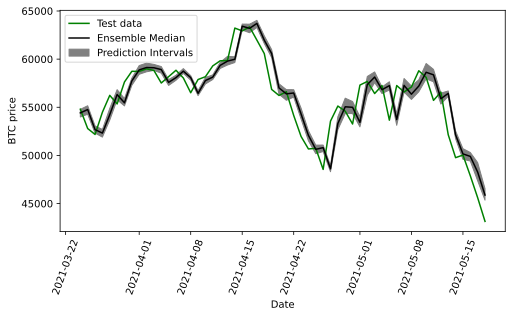

In [77]:
# plotting the prediction intervals

### get the median/mean of our ensemble_preds
ensemble_preds_median  = np.median(ensemble_preds,axis = 0)

### plot the median of our ensemble preds
offset = 500
plt.figure(figsize=(8,4))
tsf.plot_time_series(X_test.index.to_numpy(),y_test.to_numpy(),format='-',label = 'Test data',color=(0,1,0),start = offset)
tsf.plot_time_series(X_test.index.to_numpy(),ensemble_preds_median,format='-',label='Ensemble Median',color=(0,0,0),start = offset)
plt.xlabel('Date')
plt.ylabel('BTC price')

### to plot the upper and lower bounds:
tsf.plot_time_series(X_test.index.to_numpy(),values=(lower,upper),label = 'Prediction Intervals',prediction_interval=True,color='grey',xtick_rotation=70,start = offset)
plt.legend(loc='upper left')
plt.show()




**Note:** 
* All the models trained so far have been lagging behind our actual test-data, as in they are replicating what the Naive model does (just predict the previous time-step as the next time step).
* The prediction intervals are estimates themselves, and have been created and have been created with the assumption that model's data is from a normal distribution.

***-- CONTD IN NEXT NOTEBOOK --***